In [ ]:
!pip install numpy pandas matplotlib seaborn ydata-profiling

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('tested.csv')

In [4]:
p = ProfileReport(df)

In [7]:
#p.to_notebook_iframe()
p.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Overview

In [ ]:
# Number of variables
df.shape[1]

12

In [ ]:
# Number of observations
df.shape[0]

418

In [ ]:
# Missing cells
df.isnull().sum().sum()

414

In [ ]:
# Missing cells (%)
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(missing_percentage)

8.253588516746412


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


In [ ]:
# Duplicate rows (%)
total_rows = df.shape[0]
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Duplicate rows percentage: {duplicate_percentage}")

Duplicate rows percentage: 0.0


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print(f"Text columns: {categorical_cols}")

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Text columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Variables

## Numerical Variables

In [ ]:
# Distinct Values
df['PassengerId'].nunique()

418

In [ ]:
# Distinct (%)
total_values = df['PassengerId'].count()
distinct_values = df['PassengerId'].nunique()
distinct_percentage = (distinct_values / total_values) * 100
print(f"Distinct values percentage: {distinct_percentage}")

Distinct values percentage: 100.0


In [ ]:
# Missing
df['PassengerId'].isnull().sum()

0

In [ ]:
# Missing (%)
total_values = df['PassengerId'].count()
missing_values = df['PassengerId'].isnull().sum()
missing_percentage = (missing_values / total_values) * 100
print(f"Missing values percentage: {missing_percentage}")

Missing values percentage: 0.0


In [ ]:
# Mean
df['PassengerId'].mean()

1100.5

In [ ]:
# minimum
df['PassengerId'].min()

892

In [ ]:
# maximum
df['PassengerId'].max()

1309

In [ ]:
# count zeros
(df['PassengerId'] == 0).sum()

0

In [ ]:
# zero percentage
total_values = df['PassengerId'].count()
zero_values = (df['PassengerId'] == 0).sum()
zero_percentage = (zero_values / total_values) * 100
print(f"Zero values percentage: {zero_percentage}")

Zero values percentage: 0.0


In [ ]:
# count negative number and percentage
negative_values = (df['PassengerId'] < 0).sum()
negative_percentage = (negative_values / total_values) * 100
print(f"Count Negative values: {negative_values}")
print(f"Negative values percentage: {negative_percentage}")

Count Negative values: 0
Negative values percentage: 0.0


In [ ]:
# count positive number and percentage
positive_values = (df['PassengerId'] > 0).sum()
positive_percentage = (positive_values / total_values) * 100
print(f"Count positive values: {positive_values}")
print(f"positive values percentage: {positive_percentage}")

Count positive values: 418
positive values percentage: 100.0


In [13]:
# 5-th percentile
print(f"5th percentile: {df['PassengerId'].quantile(0.05)}")
# q1 percentile
print(f"25th percentile: {df['PassengerId'].quantile(0.25)}")
# q2 percentile
print(f"50th percentile: {df['PassengerId'].quantile(0.5)}")
# q3 percentile
print(f"75th percentile: {df['PassengerId'].quantile(0.75)}")
# IQR
print(f"IQR: {df['PassengerId'].quantile(0.75) - df['PassengerId'].quantile(0.25)}")
# MAX
print(f"MAX: {df['PassengerId'].max()}")
# MIn
print(f"MIN: {df['PassengerId'].min()}")
# mean
print(f"mean: {df['PassengerId'].mean()}")
# median
print(f"median: {df['PassengerId'].median()}")
# skewness
print(f"skewness: {df['PassengerId'].skew()}")

5th percentile: 912.85
25th percentile: 996.25
50th percentile: 1100.5
75th percentile: 1204.75
IQR: 208.5
MAX: 1309
MIN: 892
mean: 1100.5
median: 1100.5
skewness: 0.0
kurtosis: -1.2


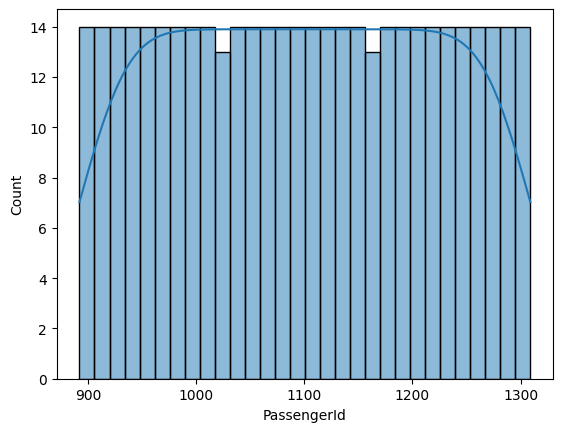

In [46]:
# checking the distributions
sns.histplot(df['PassengerId'], bins=30, kde=True)
plt.show()

## Categorical Variables

In [48]:
# Distinct Values
df['Embarked'].nunique()

3

In [49]:
# Distinct (%)
total_values = df['Embarked'].count()
distinct_values = df['Embarked'].nunique()
distinct_percentage = (distinct_values / total_values) * 100
print(f"Distinct values Embarked: {distinct_percentage}")

Distinct values Embarked: 0.7177033492822966


In [51]:
# Missing
df['Embarked'].isnull().sum()

0

In [50]:
# Missing (%)
total_values = df['Embarked'].count()
missing_values = df['Embarked'].isnull().sum()
missing_percentage = (missing_values / total_values) * 100
print(f"Missing values percentage: {missing_percentage}")

Missing values percentage: 0.0


In [53]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


<Axes: xlabel='Embarked', ylabel='count'>

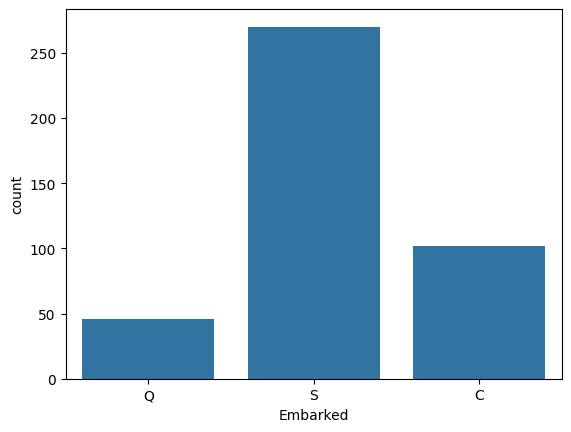

In [52]:
# countplot graph
sns.countplot(data=df, x='Embarked')
# plt.show()

# Interactions

<Axes: xlabel='PassengerId', ylabel='Fare'>

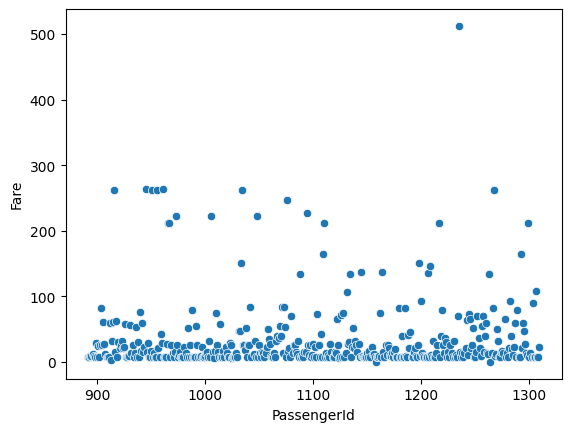

In [42]:
sns.scatterplot(data=df, x='PassengerId', y='Fare')

<Axes: xlabel='Pclass', ylabel='Age'>

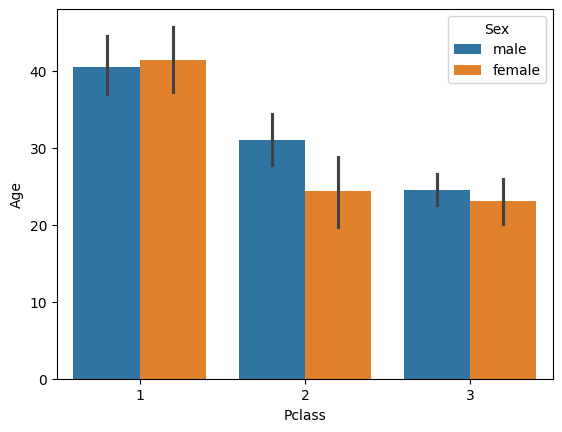

In [38]:
# numerical to categorical column -> bar plot
sns.barplot(data=df, x='Pclass', y='Age', hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

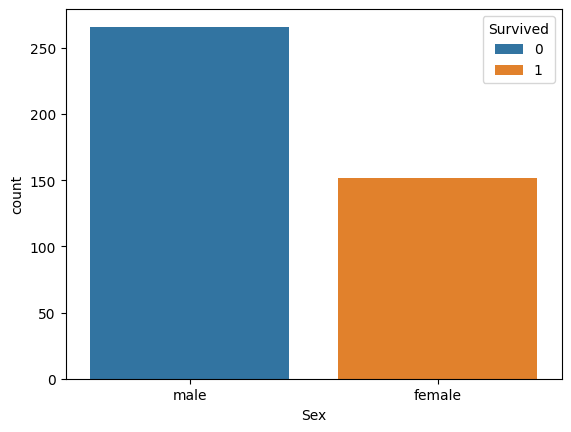

In [40]:
# categorical to categorical column -> group bar graph
sns.countplot(data=df, x='Sex', hue='Survived')